In [195]:
# load dogs vs cats dataset, reshape and save to a new file
from tensorflow.keras.preprocessing import image
from os import makedirs
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.utils import load_img
import random

#from keras.preprocessing.image import img_to_array
# define location of dataset
folder = 'train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
	# determine class
	output = 1.0
	if file.startswith('artifacts'):
		output = 0.0
	# load image
	photo = load_img(folder + file, target_size=(32, 32))
	# convert to numpy array
	photo = image.img_to_array(photo)
	# store
	photos.append(photo)
	labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save('artifacts_vs_real_photos.npy', photos)
save('artifacts_vs_real_labels.npy', labels)

(779, 32, 32, 3) (779,)


In [196]:
from tensorflow.keras.utils import load_img

In [197]:
# load and confirm the shape
from numpy import load
photos = load('artifacts_vs_real_photos.npy')
labels = load('artifacts_vs_real_labels.npy')
print(photos.shape, labels.shape)

(779, 32, 32, 3) (779,)


In [198]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

# create directories
dataset_home = 'dataset_artifacts_vs_real/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
	# create label subdirectories
	labeldirs = ['artifacts/', 'real/']
	for labldir in labeldirs:
		newdir = dataset_home + subdir + labldir
		makedirs(newdir, exist_ok=True)

In [199]:
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = 'train/'
for file in listdir(src_directory):
	src = src_directory + '/' + file
	dst_dir = 'train/'
	if random() < val_ratio:
		dst_dir = 'test/'
	if file.startswith('artifacts'):
		dst = dataset_home + dst_dir + 'artifacts/'  + file
		copyfile(src, dst)
	elif file.startswith('real'):
		dst = dataset_home + dst_dir + 'real/'  + file
		copyfile(src, dst)

Found 778 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Epoch 1/50


C:\Users\smahmud\AppData\Local\Temp/ipykernel_23448/4132628333.py:64: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_it, steps_per_epoch=len(train_it),


13/13 [==============================] - 2s 130ms/step - loss: 0.5329 - accuracy: 0.6915 - val_loss: 0.6208 - val_accuracy: 0.6000
Epoch 2/50
13/13 [==============================] - 1s 112ms/step - loss: 0.4622 - accuracy: 0.8290 - val_loss: 0.5249 - val_accuracy: 0.6250
Epoch 3/50
13/13 [==============================] - 1s 116ms/step - loss: 0.4097 - accuracy: 0.8496 - val_loss: 0.4997 - val_accuracy: 0.6333
Epoch 4/50
13/13 [==============================] - 1s 113ms/step - loss: 0.3720 - accuracy: 0.8650 - val_loss: 0.4959 - val_accuracy: 0.6333
Epoch 5/50
13/13 [==============================] - 1s 115ms/step - loss: 0.3447 - accuracy: 0.8805 - val_loss: 0.4493 - val_accuracy: 0.6639
Epoch 6/50
13/13 [==============================] - 1s 113ms/step - loss: 0.3248 - accuracy: 0.9203 - val_loss: 0.4127 - val_accuracy: 0.7750
Epoch 7/50
13/13 [==============================] - 2s 114ms/step - loss: 0.3031 - accuracy: 0.9537 - val_loss: 0.3998 - val_accuracy: 0.7806
Epoch 8/50
13/13 

C:\Users\smahmud\AppData\Local\Temp/ipykernel_23448/4132628333.py:69: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)


6/6 [==============================] - 0s 43ms/step - loss: 0.1497 - accuracy: 0.9889
> 98.889


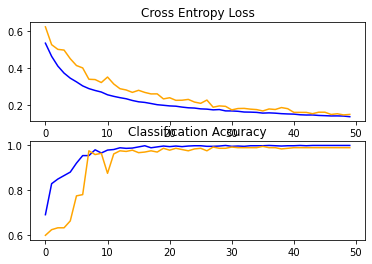

In [235]:
# baseline model for the dogs vs cats dataset
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

# define cnn model
# This is a three block vgg model
# Something wrong with the model. The NP values are showing higher than usal.
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model


# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.show()

# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generators
	train_datagen = ImageDataGenerator(rescale=1.0/255.0,
		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	test_datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = train_datagen.flow_from_directory('dataset_artifacts_vs_real/train/',
		class_mode='binary', batch_size=64, target_size=(32, 32))
	test_it = test_datagen.flow_from_directory('dataset_artifacts_vs_real/test/',
		class_mode='binary', batch_size=64, target_size=(32, 32))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=50, verbose=1)
    # save model
	model.save('final_model.h5')
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=1)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

In [238]:
# train_datagen = ImageDataGenerator(rescale=1.0/255.0,
# 		width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

# train_it = train_datagen.flow_from_directory('dataset_artifacts_vs_real/train/',
# 		class_mode='binary', batch_size=64, target_size=(200, 200))

# test_datagen = ImageDataGenerator(rescale=1.0/255.0)
# test_it = test_datagen.flow_from_directory('dataset_artifacts_vs_real/test/',
# 		class_mode='binary', batch_size=64, target_size=(200, 200))

# train_y=train_datagen.classes
# train_y = train_it.classes
# train_y.shape
# y_test = test_it.classes
# y_test.shape
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 50, 50, 128)       73856     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 25, 25, 128)    

In [236]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np


#model = load_model('final_model.h5')

y_pred=model.predict(test_it)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
y_test = test_it.classes

accuracy_score(y_pred,y_test)

print(classification_report(y_pred,y_test))


cf = confusion_matrix(y_pred,y_test)
print(cf)

6/6 [==============================] - 2s 230ms/step
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60       360
           1       0.00      0.00      0.00         0

    accuracy                           0.43       36

C:\Users\smahmud\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smahmud\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\smahmud\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


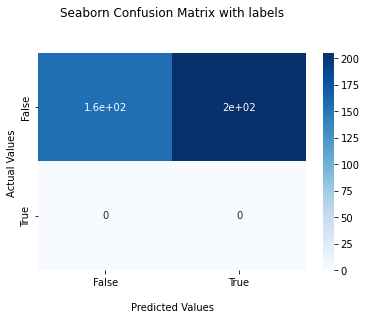

In [237]:
import seaborn as sns

ax = sns.heatmap(cf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [103]:
# save model
#model.save('final_model.h5')

1/1 [==============================] - 0s 44ms/step
Artifacts


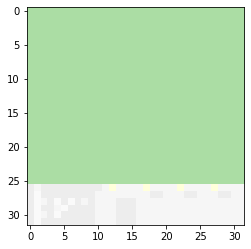

In [239]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model
import matplotlib.pyplot as plt 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32,32))
	plt.imshow(img)
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# center pixel data
	img = img.astype('float32')
	#img = img - [123.68, 116.779, 103.939]
	#plt.imshow(img)
	return img
 
# load an image and predict the class
def run_example():
	# load the image
	img = load_image(r"C:\Users\smahmud\Documents\Custom Office Templates\savefiles\suh_640_0.png")
	# load model
	model = load_model('final_model.h5')

	# predict the class
	result = model.predict(img)
	#print(result[0])
	if result[0]==0:
		print("Artifacts")
	else:
		print("Real")
# entry point, run the example
run_example()